# Production and Cash Price

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import src

import warnings
warnings.filterwarnings('ignore')

/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### Production (LB)

In [2]:
production = pd.read_csv('../csv/production_incl_calves.csv')
production = src.usda_clean_annual(production, historical=True)

<AxesSubplot:title={'center':'Production (LB)'}, ylabel='Value'>

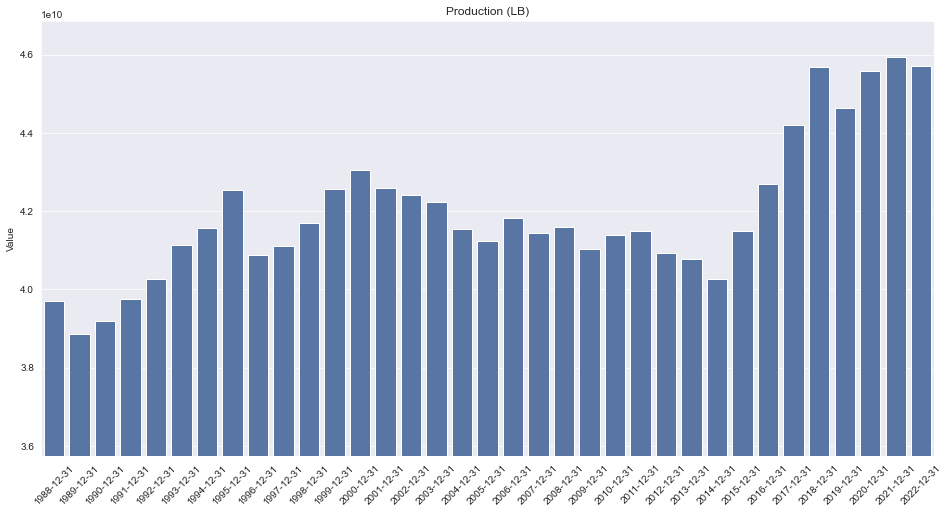

In [3]:
src.barplot(production, title="Production (LB)", ylim=0.1)

In [11]:
price_received_ge_500_national = pd.read_csv('../csv/price_received_ge_500_national.csv')
price_received_ge_500_national = src.usda_clean_monthly(price_received_ge_500_national, historical=True)

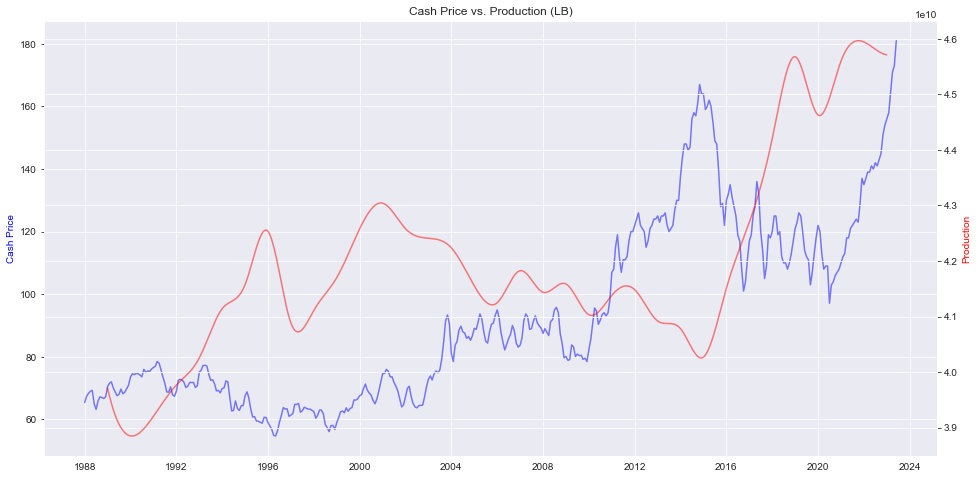

In [22]:
src.lineplot_2_own_axis(
    price_received_ge_500_national[price_received_ge_500_national.index.year >= 1988],
    src.cubicspline(production),
    'Cash Price',
    'Production',
    title='Cash Price vs. Production (LB)'
    )

In [20]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

y = price_received_ge_500_national.resample('Y').mean().pct_change()*100
y = y.dropna()
y.name = 'price_received_ge_500_national_pct_chg'

x = production.resample('Y').last().pct_change()*100
x = x.dropna()
x.name = 'production_lb'

intersection = y.index.intersection(x.index)

y = y.loc[intersection]
x = x.loc[intersection]


model = sm.OLS(y, add_constant(x)).fit()

print(model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     price_received_ge_500_national_pct_chg   R-squared:                       0.085
Model:                                                OLS   Adj. R-squared:                  0.057
Method:                                     Least Squares   F-statistic:                     2.981
Date:                                    Sun, 17 Sep 2023   Prob (F-statistic):             0.0939
Time:                                            23:04:55   Log-Likelihood:                -122.87
No. Observations:                                      34   AIC:                             249.7
Df Residuals:                                          32   BIC:                             252.8
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

- Annual %∆ in mean cash price is negatively associated with %∆ in production of live cattle with a coefficient of -1.57
- R-squared is 0.085 - production alone does not explain much of the variation in price change

No handles with labels found to put in legend.


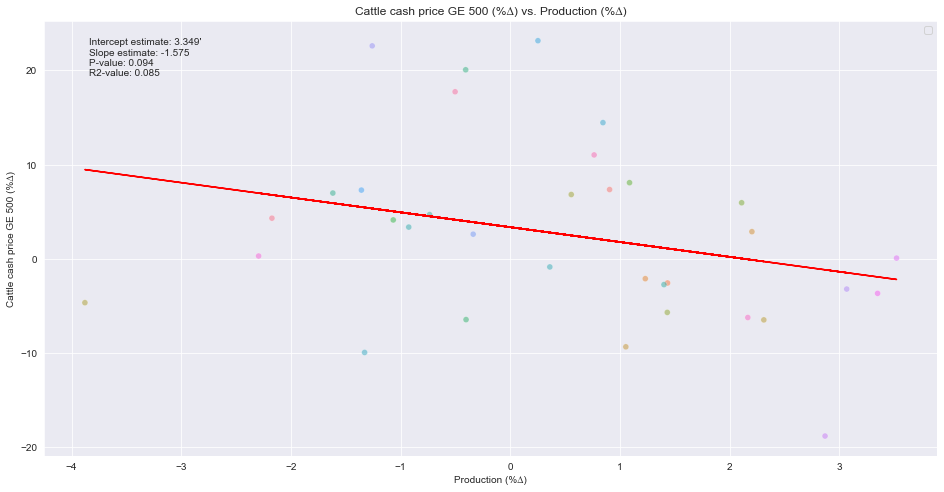

In [23]:
src.scatterplot(
    y,
    x,
    'Cattle cash price GE 500 (%∆)',
    'Production (%∆)',
    reg=True,
    title='Cattle cash price GE 500 (%∆) vs. Production (%∆)'
)